### Parte 1: Análise de Sentimentos com TF-IDF e Regressão Logística

*Questão 1*

In [180]:
import os
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer

In [181]:
def carregar_dados(diretorio_base):
    """
    Carrega os dados do IMDb a partir do diretório base (ex: 'aclImdb/train').
    Retorna um DataFrame com duas colunas: 'review' e 'sentiment' (1=positivo, 0=negativo).
    """
    textos = []
    labels = []

    for tipo in ['pos', 'neg']:
        caminho = os.path.join(diretorio_base, tipo)
        for arquivo in os.listdir(caminho):
            if arquivo.endswith('.txt'):
                with open(os.path.join(caminho, arquivo), encoding='utf-8') as f:
                    textos.append(f.read())
                    labels.append(1 if tipo == 'pos' else 0)

    return pd.DataFrame({'review': textos, 'sentiment': labels})

In [182]:
caminho_base = 'aclImdb/train'
df_train = carregar_dados(caminho_base)

df_train.head()

,review,sentiment
0,For a movie that gets no respect there sure ar...,1
1,Bizarre horror movie filled with famous faces ...,1
2,"A solid, if unremarkable film. Matthau, as Ein...",1
3,It's a strange feeling to sit alone in a theat...,1
4,"You probably all already know this by now, but...",1


In [183]:
# limitando o vocabulário para 10.000 palavras mais relevantes
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')

# Aplicando a transformação aos textos
X_tfidf = vectorizer.fit_transform(df_train['review'])

# Rótulos (0 = negativo, 1 = positivo)
y = df_train['sentiment']

In [184]:
print(f"Formato da matriz TF-IDF: {X_tfidf.shape}")

Formato da matriz TF-IDF: (25000, 10000)


*Questão 2*

In [185]:
import numpy as np

# Pegando o nome de cada feature (palavra)
features = np.array(vectorizer.get_feature_names_out())

# Calculando a média de TF-IDF de cada feature em todos os documentos
tfidf_means = np.asarray(X_tfidf.mean(axis=0)).ravel()

# Criando um DataFrame para facilitar visualização
df_tfidf = pd.DataFrame({'feature': features, 'mean_tfidf': tfidf_means})

# Ordenando pelas médias de TF-IDF
top_10 = df_tfidf.sort_values(by='mean_tfidf', ascending=False).head(10)
bottom_10 = df_tfidf.sort_values(by='mean_tfidf', ascending=True).head(10)

print("🔝 Top 10 palavras com maior média de TF-IDF:")
display(top_10)

print("\n🔻 Top 10 palavras com menor média de TF-IDF:")
display(bottom_10)

🔝 Top 10 palavras com maior média de TF-IDF:


,feature,mean_tfidf
1170,br,0.100920
5946,movie,0.053374
3497,film,0.044372
5282,like,0.025320
4959,just,0.023792
3945,good,0.022667
7220,really,0.019081
8596,story,0.018960
9089,time,0.018746
799,bad,0.018020



🔻 Top 10 palavras com menor média de TF-IDF:


,feature,mean_tfidf
958,benoit,0.000060
8876,taker,0.000068
6826,ppv,0.000081
9986,zenia,0.000081
1122,booker,0.000082
9374,undertaker,0.000087
4836,jaffar,0.000089
4096,hackenstein,0.000092
1992,conroy,0.000094
7544,ripley,0.000096


**Análise dos resultados:**

As palavras com TF-IDF mais alto costumam ser mais específicas — aparecem bastante em poucas resenhas, e por isso podem carregar alguma opinião ou característica mais marcante. Muitas vezes são termos com carga emocional ou que aparecem em contextos mais fortes.

Já as com TF-IDF baixo são mais genéricas: aparecem em quase todas as resenhas, mas sem peso. Tipo aquelas palavras que não ajudam muito o modelo a entender se a pessoa gostou ou não do filme.

Exemplos:

- Termos técnicos de cinema como “film” ou “movie” aparecem o tempo todo, mas não dizem se a crítica é boa ou ruim.
- Palavras comuns tipo “one” ou “will”, que passam batido no contexto de sentimento.

Obs.: TF-IDF alto não quer dizer que a palavra é positiva ou negativa — só que ela se destaca em alguns textos. O modelo que vai aprender se ela ajuda a prever o sentimento ou não.

*Questão 3*

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 80% treino, 20% teste
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_val)

acuracia = accuracy_score(y_val, y_pred)
print(f"🎯 Acurácia do modelo de Regressão Logística: {acuracia:.4f}")

🎯 Acurácia do modelo de Regressão Logística: 0.8842


*Questão 4*

/var/folders/lp/_nhwszm93ld0m_glx4_v4bnh0000gn/T/ipykernel_3851/3770785646.py:21: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/victor/Desktop/Workspaces/instituto infnet/Dados para Machine Learning - Feature Engineering/TP/TP3/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


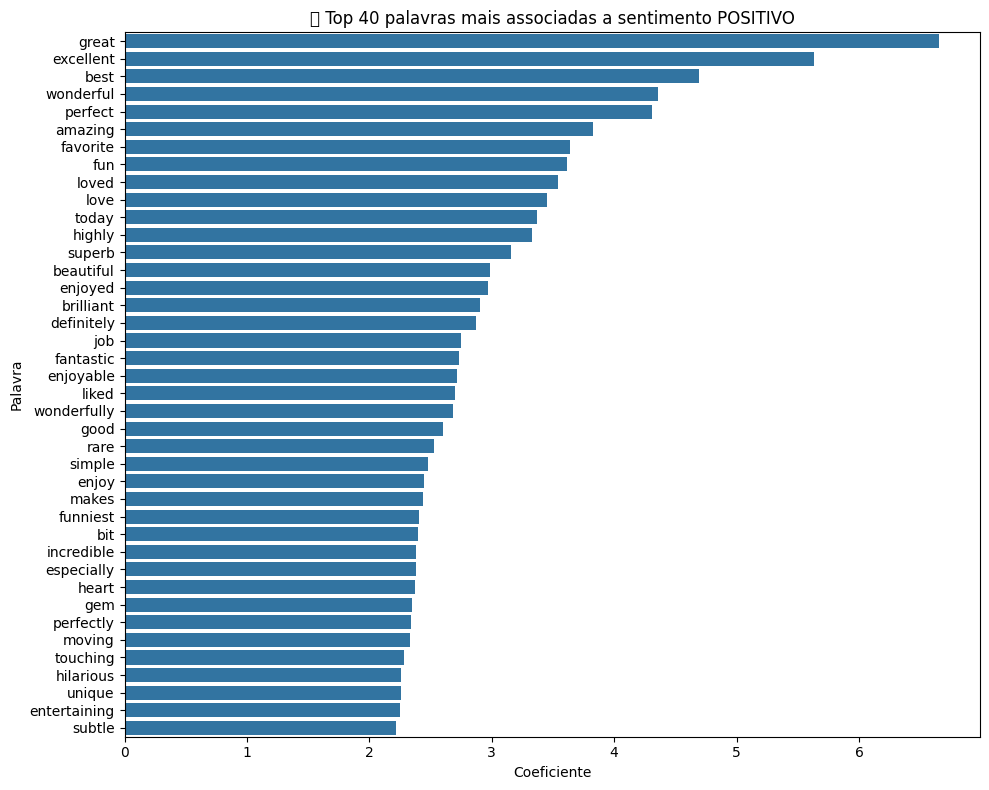

/var/folders/lp/_nhwszm93ld0m_glx4_v4bnh0000gn/T/ipykernel_3851/3770785646.py:29: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/victor/Desktop/Workspaces/instituto infnet/Dados para Machine Learning - Feature Engineering/TP/TP3/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


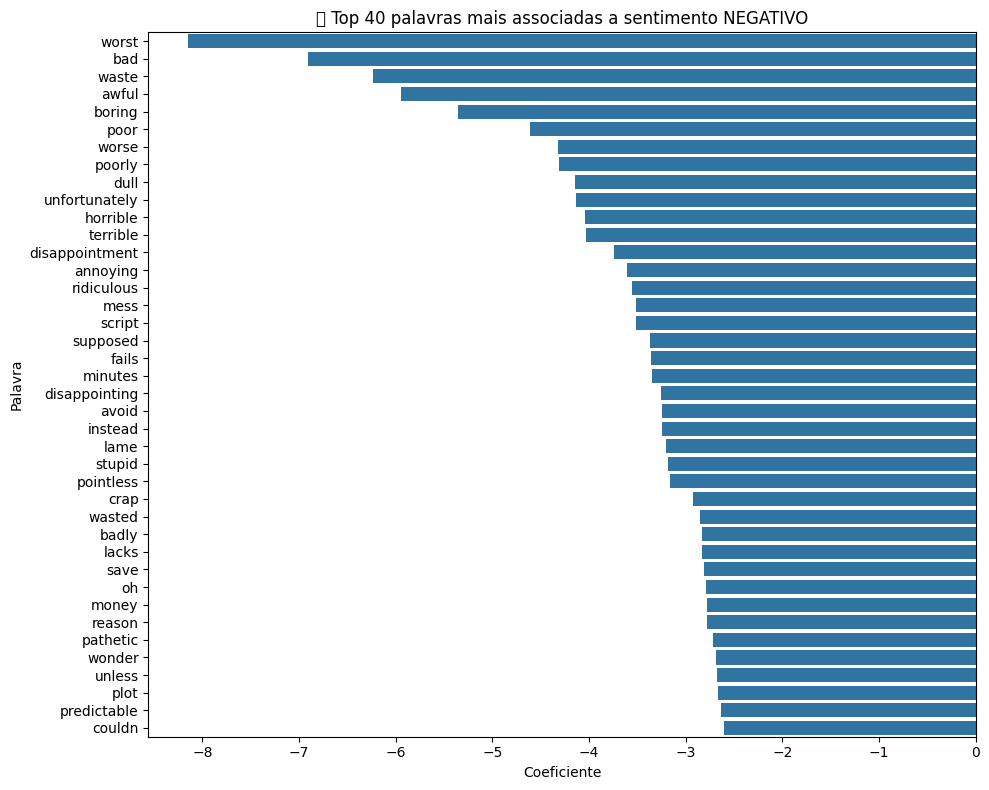

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extraindo os coeficientes (1 valor por feature)
coefs = modelo.coef_[0]

# Juntando com os nomes das features
coef_df = pd.DataFrame({
    'feature': vectorizer.get_feature_names_out(),
    'coef': coefs
})

top_40_pos = coef_df.sort_values(by='coef', ascending=False).head(40)
top_40_neg = coef_df.sort_values(by='coef', ascending=True).head(40)

plt.figure(figsize=(10, 8))
sns.barplot(data=top_40_pos, x='coef', y='feature')
plt.title('🔵 Top 40 palavras mais associadas a sentimento POSITIVO')
plt.xlabel('Coeficiente')
plt.ylabel('Palavra')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.barplot(data=top_40_neg, x='coef', y='feature')
plt.title('🔴 Top 40 palavras mais associadas a sentimento NEGATIVO')
plt.xlabel('Coeficiente')
plt.ylabel('Palavra')
plt.tight_layout()
plt.show()

**Análise dos coeficientes:**

Os coeficientes mostram o quanto cada palavra ajuda o modelo a decidir se uma resenha é positiva ou negativa.

- Quando o coeficiente é positivo, quer dizer que aquela palavra puxa o modelo pra classificar como positivo.
- Se for negativo, é sinal de que a palavra costuma aparecer em resenhas negativas.

Porém, nem sempre isso faz sentido real. Às vezes aparecem palavras que não têm nada a ver com sentimento e mesmo assim têm peso alto. Pode ser por:

- Coincidência nos dados de treino (tipo uma palavra aleatória que apareceu muito em resenha ruim).
- Palavras neutras que escaparam do filtro de stopwords.
- Ou o modelo aprendeu algum padrão estranho (overfitting).

Pra melhorar isso:
- Pode-se revisar as palavras com mais peso e ver se faz sentido mantê-las.
- Incluir bigramas (combinações de duas palavras) pode ajudar o modelo a pegar contexto.
- Ou usar mais regularização pra segurar esses pesos malucos.

### Parte 2: Vetorização de Variáveis Categóricas

In [188]:
# Dataset conforme a imagem
dados = {
    'Dia':   ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14'],
    'Aspecto': ['Sol', 'Sol', 'Nuvens', 'Chuva', 'Chuva', 'Chuva', 'Nuvens', 'Sol', 'Nuvens', 'Chuva', 'Sol', 'Nuvens', 'Nuvens', 'Chuva'],
    'Temp.':   ['Quente', 'Quente', 'Quente', 'Ameno', 'Fresco', 'Fresco', 'Fresco', 'Ameno', 'Fresco', 'Ameno', 'Ameno', 'Ameno', 'Quente', 'Ameno'],
    'Humidade': ['Elevada', 'Elevada', 'Elevada', 'Elevada', 'Normal', 'Normal', 'Normal', 'Elevada', 'Normal', 'Normal', 'Normal', 'Elevada', 'Normal', 'Elevada'],
    'Vento':    ['Fraco', 'Forte', 'Fraco', 'Fraco', 'Fraco', 'Forte', 'Fraco', 'Fraco', 'Fraco', 'Forte', 'Fraco', 'Forte', 'Fraco', 'Forte'],
    'Jogar Tênis': ['Não', 'Não', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não']
}

df = pd.DataFrame(dados)

# Mapeando rótulo de saída para binário
df['Jogar Tênis'] = df['Jogar Tênis'].map({'Sim': 1, 'Não': 0})

df.head()

,Dia,Aspecto,Temp.,Humidade,Vento,Jogar Tênis
0,D1,Sol,Quente,Elevada,Fraco,0
1,D2,Sol,Quente,Elevada,Forte,0
2,D3,Nuvens,Quente,Elevada,Fraco,1
3,D4,Chuva,Ameno,Elevada,Fraco,1
4,D5,Chuva,Fresco,Normal,Fraco,1


*Questão 5*

In [189]:
df_onehot = pd.get_dummies(df.drop(columns='Dia'), drop_first=False)

df_onehot.head()

,Jogar Tênis,Aspecto_Chuva,Aspecto_Nuvens,Aspecto_Sol,Temp._Ameno,Temp._Fresco,Temp._Quente,Humidade_Elevada,Humidade_Normal,Vento_Forte,Vento_Fraco
0,0,False,False,True,False,False,True,True,False,False,True
1,0,False,False,True,False,False,True,True,False,True,False
2,1,False,True,False,False,False,True,True,False,False,True
3,1,True,False,False,True,False,False,True,False,False,True
4,1,True,False,False,False,True,False,False,True,False,True


*Questão 6*

In [190]:
df_dummy = pd.get_dummies(df.drop(columns='Dia'), drop_first=True)

df_dummy.head()

,Jogar Tênis,Aspecto_Nuvens,Aspecto_Sol,Temp._Fresco,Temp._Quente,Humidade_Normal,Vento_Fraco
0,0,False,True,False,True,False,True
1,0,False,True,False,True,False,False
2,1,True,False,False,True,False,True
3,1,False,False,False,False,False,True
4,1,False,False,True,False,True,True


In [191]:
# Renomeando colunas, evitando problemas com nomes
df = df.rename(columns={
    'Temp.': 'Temperatura',
    'Humidade': 'Umidade',
    'Vento': 'Vento',
    'Aspecto': 'Aspecto',
    'Jogar Tênis': 'Jogar_Tenis'
})

*Questão 7*

In [192]:
from patsy import dmatrix

formula = 'C(Aspecto, Sum) + C(Temperatura, Sum) + C(Umidade, Sum) + C(Vento, Sum)'

X_effect = dmatrix(formula, df, return_type='dataframe')

df_effect = X_effect.copy()
df_effect['Jogar_Tenis'] = df['Jogar_Tenis']

df_effect.head()

,Intercept,"C(Aspecto, Sum)[S.Chuva]","C(Aspecto, Sum)[S.Nuvens]","C(Temperatura, Sum)[S.Ameno]","C(Temperatura, Sum)[S.Fresco]","C(Umidade, Sum)[S.Elevada]","C(Vento, Sum)[S.Forte]",Jogar_Tenis
0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,0
1,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0
2,1.0,0.0,1.0,-1.0,-1.0,1.0,-1.0,1
3,1.0,1.0,0.0,1.0,0.0,1.0,-1.0,1
4,1.0,1.0,0.0,0.0,1.0,-1.0,-1.0,1


*Questão 8*

In [193]:
comparacao = pd.DataFrame({
    'Codificação': ['One-Hot Encoding', 'Dummy Encoding', 'Effect Encoding'],
    'Nº de Colunas': ['Alta', 'Média', 'Média'],
    'Remove Categoria?': ['Não', 'Sim', 'Sim'],
    'Multicolinearidade': ['Pode causar', 'Evita', 'Evita'],
    'Interpretação': [
        'Presença/ausência direta',
        'Comparação com categoria de referência',
        'Comparação com média geral'
    ],
    'Quando usar': [
        'Modelos não-lineares (árvores, redes neurais)',
        'Regressões (linear/logística)',
        'Modelos explicativos / análise estatística'
    ]
})

display(comparacao)

,Codificação,Nº de Colunas,Remove Categoria?,Multicolinearidade,Interpretação,Quando usar
0,One-Hot Encoding,Alta,Não,Pode causar,Presença/ausência direta,"Modelos não-lineares (árvores, redes neurais)"
1,Dummy Encoding,Média,Sim,Evita,Comparação com categoria de referência,Regressões (linear/logística)
2,Effect Encoding,Média,Sim,Evita,Comparação com média geral,Modelos explicativos / análise estatística


**Resumo da comparação:**

O One-Hot é o mais direto — cria uma coluna pra cada categoria. É fácil de entender, mas pode gerar muitas colunas e causar multicolinearidade em modelos lineares.

O Dummy já resolve isso removendo uma das categorias de cada variável, evitando redundância. É o padrão pra regressão.

O Effect Encoding é mais voltado pra estatística mesmo — ele te mostra o desvio de cada categoria em relação à média. Ótimo pra interpretar efeitos, mas um pouco mais avançado.


*Questão 9*

A vetorização das variáveis categóricas é uma etapa essencial quando a gente quer trabalhar com algoritmos de aprendizado de máquina, porque esses modelos só funcionam com valores numéricos. Ao transformar categorias em vetores, a gente consegue alimentar o modelo com informações que antes ele não conseguiria interpretar. E mais do que isso: dependendo da técnica que a gente usa — como One-Hot, Dummy ou Effect Encoding — também conseguimos controlar o tipo de comparação que será feita entre as categorias, o que pode ser muito útil dependendo do tipo de modelo que estamos usando.

Outra vantagem é que a vetorização ajuda o modelo a identificar padrões nas categorias que podem ser relevantes para a tarefa. Por exemplo, se “Chuva” aparece muito em dias em que a pessoa não joga tênis, isso vira um padrão que o modelo pode capturar. Também é importante ressaltar que os vetores são uma forma mais neutra de representar essas categorias. Se a gente simplesmente atribuísse números como “Sol = 1, Nuvens = 2, Chuva = 3”, estaríamos colocando uma ordem que não necessariamente existe, e isso poderia confundir o modelo. Com a vetorização, evitamos esse tipo de erro e deixamos os dados prontos pra serem interpretados da forma certa.

*Questão 10*

Apesar de ser útil, vetorizar variáveis categóricas também tem seus pontos negativos. Um deles é que, dependendo da quantidade de categorias que uma variável tem, isso pode gerar muitas colunas extras no dataset. Isso acontece principalmente com o One-Hot Encoding, que cria uma coluna pra cada categoria. Em datasets maiores ou com muitas variáveis desse tipo, isso pode virar um problema de desempenho ou até deixar o modelo mais difícil de treinar.

Outra desvantagem é que, se a vetorização não for feita com cuidado, ela pode causar multicolinearidade. Isso é um problema comum em modelos lineares quando usamos One-Hot sem remover uma categoria de referência — o modelo começa a ter colunas que são combinações perfeitas de outras, o que atrapalha bastante os cálculos. Além disso, os vetores resultantes são normalmente esparsos, ou seja, têm muitos zeros, o que pode deixar o treinamento mais lento ou ineficiente dependendo do algoritmo.

Também vale ressaltar que nem sempre faz sentido vetorializar tudo. Às vezes a variável categórica não tem relação com o resultado e, ao invés de ajudar, ela só adiciona “barulho” nos dados. E tem ainda o caso de variáveis ordinais, que têm uma ordem lógica (tipo “baixo”, “médio”, “alto”), mas perdem essa noção quando viram colunas separadas.

### Parte 3: Outras Técnicas de Transformação de Features

*Questão 11*

O Feature Hashing é uma técnica usada pra representar variáveis categóricas de forma numérica, mas sem criar uma coluna pra cada categoria como no One-Hot. Em vez disso, ele usa uma função hash pra jogar as categorias dentro de um número fixo de colunas. É como se cada categoria fosse “encriptada” em uma posição de um vetor, o que economiza bastante memória quando temos muitas categorias.

A grande vantagem do Feature Hashing é que ele não precisa saber todas as categorias com antecedência (ou seja, não precisa de um vocabulário fixo) e ainda evita explosão de dimensionalidade. Porém, existe o risco de colisões: duas categorias diferentes podem acabar caindo na mesma posição, o que pode confundir o modelo. Ainda assim, se o número de colunas (features) for razoável, o impacto dessas colisões é pequeno.

In [194]:
from sklearn.feature_extraction import FeatureHasher

df_hash = df[['Aspecto', 'Temperatura', 'Umidade', 'Vento']]

# Convertendo para lista de dicionários (requisito do FeatureHasher)
dados_dict = df_hash.to_dict(orient='records')

# Criando o hasher (definimos 8 colunas como exemplo)
hasher = FeatureHasher(n_features=8, input_type='dict')

# Aplicando o hashing
X_hash = hasher.transform(dados_dict).toarray()

# Convertendo para DataFrame pra visualizar
df_hashing = pd.DataFrame(X_hash)

df_hashing.head()


,0,1,2,3,4,5,6,7
0,0.0,0.0,-1.0,0.0,-3.0,0.0,0.0,0.0
1,0.0,0.0,-1.0,0.0,-2.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,-3.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0


*Questão 12*

Bin Counting é uma técnica mais simples, geralmente usada quando temos variáveis categóricas inteiras (por exemplo, categorias representadas como números inteiros já). A ideia é basicamente criar uma contagem em binários, na qual cada categoria vira uma posição numérica dentro de um vetor, e a presença dela é marcada com um 1 naquela posição (como se fosse uma contagem “em baldes”).

Essa técnica é útil quando as categorias já são números inteiros consecutivos e não têm muitos valores únicos. Mas ela não funciona bem com strings ou categorias não numeradas, porque o modelo não saberia como lidar com os rótulos.

In [195]:
aspecto_mapeado = df['Aspecto'].map({'Sol': 0, 'Nuvens': 1, 'Chuva': 2})

# Definindo número de categorias
num_bins = 3

# Criando uma matriz binária (1 na posição da categoria)
X_bin = np.zeros((len(aspecto_mapeado), num_bins))
X_bin[np.arange(len(aspecto_mapeado)), aspecto_mapeado] = 1

# Visualizando como DataFrame
df_bin = pd.DataFrame(X_bin, columns=['Sol', 'Nuvens', 'Chuva'])
df_bin.head()

,Sol,Nuvens,Chuva
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
